
# **Xente Fraud Detection Project**

---

 - ### Date : 16/04/2023
 - ### Course : Introduction to Machine Learning

---

- ### Student name : **Mimassi Joseph (195178)**


- ### Teacher name :  Hasselman Ken (HSL)


- ### Academic year : 2022 - 2023

### ECAM Brussels Engineering School

![ECAM](Logo_ECAM.png)

---

# 1. Exploratory Data Analysis 
<!-- <a id='Exploratory-Data-Analysis'></a> -->

## Goal : 
-   First steps to understand our data
-   Develop a first strategy for data modeling

## Basic information :
### Shape analysis :
-   **Target variable** : FraudResult
-   **Number of lines and columns** : 95662, 16
-   **variable types** : Qualitative : 11, Quantitative : 5
-   **Missing values** : 0, we don't care about missing values

### Deep analysis :
-   **Target visualisation** : 0.997982 % of non-fraud and 0.002018 % of fraud, we need to balance this dataset !
-   **Variables signification** : 
    -   Quantitative variable (float, int) : Standardized dataset mean values centered in 0 but there are some high abberant values
    -   Qualitative variable (object) : Binary value for the target variable (FraudResult) but the other variables are just numbered object (Channel1, Channel2, Channel3, ...) and 1 time variable which will be preprocessed with feature engineering

-   **Variable / Target Relation** : 
    -   It seems that the number of fraud was higher in the last dates (something like 2019), my hypothesis is that there were more fraud during the pandemic
    -   The ProviderId 3 and 5 has almost no fraud
    -   A lot of fraud on the ProductId 6 and 7
    -   Almost all the fraud was with the ProductCategory2
    -   Almost all the fraud was in the ChannelId2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='once')

C:\Users\jomim\AppData\Local\Temp\ipykernel_29144\1316008013.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Import training data

In [2]:
data = pd.read_csv('training.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'training.csv'

In [ ]:
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


This is the training.csv dataset, it will be used to create the training (to train the model) and validation (to evaluate the model) dataset by splitting this dataset.

## Shape Analysis

In [ ]:
df = data.copy()

In [ ]:
df.dtypes.value_counts()

object     11
int64       4
float64     1
dtype: int64

We will deal with object, int, float types. That means that we will separate the int, float and object to apply some preprocessing on each one separately

## Missing values

In [ ]:
df.shape

(95662, 16)

Very big dataset with 16 columns, that means that this type of dataset will be very hard to train especially by doing cross-validations

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

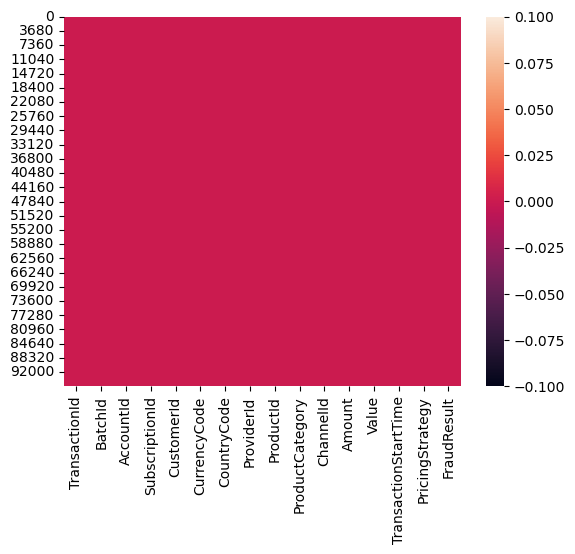

In [ ]:
sns.heatmap(df.isna())
df.isnull().sum()

This dataset is really awesome because we don't have to worry about missing data, the dataset appears to have already been cleaned

## Deep Analysis

### 1. First visualization - Elimination of the useless columns

In [ ]:
import json

my_dict = {
    'TransactionId': len(df['TransactionId'].unique().tolist()),
    'BatchId': len(df['BatchId'].unique().tolist()),
    'AccountId': len(df['AccountId'].unique().tolist()),
    'SubscriptionId': len(df['SubscriptionId'].unique().tolist()),
    'CustomerId': len(df['CustomerId'].unique().tolist()),
    'CurrencyCode': len(df['CurrencyCode'].unique().tolist()),
    'CountryCode': len(df['CountryCode'].unique().tolist()),
    'ProviderId': len(df['ProviderId'].unique().tolist()),
    'ProductId': len(df['ProductId'].unique().tolist()),
    'ProductCategory': len(df['ProductCategory'].unique().tolist()),
    'ChannelId': len(df['ChannelId'].unique().tolist()),
    'Amount': len(df['Amount'].unique().tolist()),
    'Value': len(df['Value'].unique().tolist()),
    'TransactionStartTime': len(df['TransactionStartTime'].unique().tolist()),
    'PricingStrategy': len(df['PricingStrategy'].unique().tolist()),
    'FraudResult': len(df['FraudResult'].unique().tolist())
}

print(json.dumps(my_dict, indent=4))

df.BatchId.unique().shape

{
    "TransactionId": 95662,
    "BatchId": 94809,
    "AccountId": 3633,
    "SubscriptionId": 3627,
    "CustomerId": 3742,
    "CurrencyCode": 1,
    "CountryCode": 1,
    "ProviderId": 6,
    "ProductId": 23,
    "ProductCategory": 9,
    "ChannelId": 4,
    "Amount": 1676,
    "Value": 1517,
    "TransactionStartTime": 94556,
    "PricingStrategy": 4,
    "FraudResult": 2
}


(94809,)

- We will obviously eliminate the **TransactionId** which does not contain any good information for prediction, it's just caused by the formalization of the database.
- **CurrencyCode** and **CountryCode** contains 1 unique value, that means that all the values use the same feature, this is also obviously

In [ ]:
df = df.drop(['TransactionId','CurrencyCode','CountryCode'], axis=1)

In [ ]:
df

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0


In [ ]:
df.dtypes.value_counts()

object     9
int64      3
float64    1
dtype: int64

Categorical (text type) and number types are present in the dataset, we will preprocess them separately for the training

In [ ]:
df['FraudResult'].value_counts()/df['FraudResult'].shape

0    0.997982
1    0.002018
Name: FraudResult, dtype: float64

This dataset is very imbalanced so we have to rebalanced it with over or downsampling

## Continuous variables histogram

In [ ]:
for col in df.select_dtypes('object'):
    print(f'{col :-<80},{ df[col].unique()}')

BatchId-------------------------------------------------------------------------,['BatchId_36123' 'BatchId_15642' 'BatchId_53941' ... 'BatchId_118602'
 'BatchId_70924' 'BatchId_29317']
AccountId-----------------------------------------------------------------------,['AccountId_3957' 'AccountId_4841' 'AccountId_4229' ... 'AccountId_557'
 'AccountId_2476' 'AccountId_1685']
SubscriptionId------------------------------------------------------------------,['SubscriptionId_887' 'SubscriptionId_3829' 'SubscriptionId_222' ...
 'SubscriptionId_4806' 'SubscriptionId_3567' 'SubscriptionId_84']
CustomerId----------------------------------------------------------------------,['CustomerId_4406' 'CustomerId_4683' 'CustomerId_988' ... 'CustomerId_893'
 'CustomerId_2892' 'CustomerId_2067']
ProviderId----------------------------------------------------------------------,['ProviderId_6' 'ProviderId_4' 'ProviderId_1' 'ProviderId_5'
 'ProviderId_3' 'ProviderId_2']
ProductId---------------------------------

### Encoding the objects data

In [ ]:
categorical_cols = [col for col in df.select_dtypes('object')]
categorical_cols = categorical_cols + ['PricingStrategy']
df_object = df[categorical_cols]
df_object

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime,PricingStrategy
0,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,2018-11-15T02:18:49Z,2
1,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2018-11-15T02:19:08Z,2
2,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,2018-11-15T02:44:21Z,2
3,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,2018-11-15T03:32:55Z,2
4,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2018-11-15T03:34:21Z,2
...,...,...,...,...,...,...,...,...,...,...
95657,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2019-02-13T09:54:09Z,2
95658,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,ProviderId_6,ProductId_10,airtime,ChannelId_3,2019-02-13T09:54:25Z,2
95659,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2019-02-13T09:54:35Z,2
95660,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,ProviderId_6,ProductId_19,tv,ChannelId_3,2019-02-13T10:01:10Z,2


There are all the categorical columns

Let's use the ordinal encoder just for the data analysis, it will be very usefull to just enumerate the rows. It can be used here just to plot and understand the data but not in modelisation because doing that induces that there are relation between the data but in the reality it's not true. 
For exemple : ChannelId = 2 does'nt mean that it's the double of ChannelId = 1.
In modelisation we will use the OneHotEncoder to do this kind of transformation, it will be explained later.

I made the choice to concatenate the PricingStrategy columns for the same reasons as before but the PricingStrategy was not an object type but it will be used in the same way as them

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

encoder = OrdinalEncoder()
df[categorical_cols] = encoder.fit_transform(df_object)
df_object = df[categorical_cols]
df_object

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime,PricingStrategy
0,46980.0,2490.0,3535.0,2584.0,5.0,1.0,0.0,2.0,0.0,2.0
1,31755.0,3219.0,2366.0,2584.0,3.0,19.0,2.0,1.0,1.0,2.0
2,60272.0,2713.0,996.0,2806.0,5.0,0.0,0.0,2.0,2.0,2.0
3,1797.0,3351.0,974.0,3733.0,0.0,11.0,8.0,2.0,3.0,2.0
4,48941.0,3219.0,2366.0,3733.0,3.0,19.0,2.0,1.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...
95657,92361.0,3219.0,2366.0,1504.0,3.0,19.0,2.0,1.0,94551.0,2.0
95658,46175.0,2055.0,1349.0,2154.0,5.0,1.0,0.0,2.0,94552.0,2.0
95659,13891.0,3219.0,2366.0,2154.0,3.0,19.0,2.0,1.0,94553.0,2.0
95660,73014.0,296.0,3344.0,521.0,5.0,8.0,7.0,2.0,94554.0,2.0


In [ ]:
df_numeric = df[['Amount', 'Value', 'FraudResult']]

In [ ]:
df = pd.concat([df_object,df_numeric], axis=1, ignore_index=False)
df

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime,PricingStrategy,Amount,Value,FraudResult
0,46980.0,2490.0,3535.0,2584.0,5.0,1.0,0.0,2.0,0.0,2.0,1000.0,1000,0
1,31755.0,3219.0,2366.0,2584.0,3.0,19.0,2.0,1.0,1.0,2.0,-20.0,20,0
2,60272.0,2713.0,996.0,2806.0,5.0,0.0,0.0,2.0,2.0,2.0,500.0,500,0
3,1797.0,3351.0,974.0,3733.0,0.0,11.0,8.0,2.0,3.0,2.0,20000.0,21800,0
4,48941.0,3219.0,2366.0,3733.0,3.0,19.0,2.0,1.0,4.0,2.0,-644.0,644,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,92361.0,3219.0,2366.0,1504.0,3.0,19.0,2.0,1.0,94551.0,2.0,-1000.0,1000,0
95658,46175.0,2055.0,1349.0,2154.0,5.0,1.0,0.0,2.0,94552.0,2.0,1000.0,1000,0
95659,13891.0,3219.0,2366.0,2154.0,3.0,19.0,2.0,1.0,94553.0,2.0,-20.0,20,0
95660,73014.0,296.0,3344.0,521.0,5.0,8.0,7.0,2.0,94554.0,2.0,3000.0,3000,0


## Target / variable relation

### Creation of the subset positive and negative 

In [ ]:
positive_df = df[df['FraudResult']== 1]
positive_df

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime,PricingStrategy,Amount,Value,FraudResult
131,90143.0,2379.0,2640.0,2472.0,2.0,6.0,2.0,2.0,119.0,0.0,700000.0,700000,1
146,19081.0,1120.0,3210.0,3497.0,4.0,22.0,2.0,0.0,133.0,2.0,725000.0,725000,1
155,2886.0,2379.0,2640.0,2472.0,2.0,6.0,2.0,2.0,142.0,0.0,700000.0,700000,1
2376,59300.0,2248.0,2036.0,2347.0,0.0,6.0,2.0,2.0,2345.0,0.0,700000.0,700000,1
2452,60671.0,2379.0,2640.0,2472.0,2.0,6.0,2.0,2.0,2420.0,0.0,700000.0,700000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94805,8999.0,3086.0,2639.0,3180.0,2.0,6.0,2.0,2.0,93709.0,2.0,2000000.0,2000000,1
95108,21508.0,735.0,1223.0,919.0,5.0,16.0,0.0,2.0,94009.0,2.0,500000.0,500000,1
95262,49978.0,735.0,1223.0,919.0,2.0,6.0,2.0,2.0,94161.0,2.0,500000.0,500000,1
95264,49978.0,735.0,1223.0,919.0,2.0,6.0,2.0,2.0,94163.0,2.0,500000.0,500000,1


In [ ]:
negative_df = df[df['FraudResult']== 0]
negative_df

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime,PricingStrategy,Amount,Value,FraudResult
0,46980.0,2490.0,3535.0,2584.0,5.0,1.0,0.0,2.0,0.0,2.0,1000.0,1000,0
1,31755.0,3219.0,2366.0,2584.0,3.0,19.0,2.0,1.0,1.0,2.0,-20.0,20,0
2,60272.0,2713.0,996.0,2806.0,5.0,0.0,0.0,2.0,2.0,2.0,500.0,500,0
3,1797.0,3351.0,974.0,3733.0,0.0,11.0,8.0,2.0,3.0,2.0,20000.0,21800,0
4,48941.0,3219.0,2366.0,3733.0,3.0,19.0,2.0,1.0,4.0,2.0,-644.0,644,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,92361.0,3219.0,2366.0,1504.0,3.0,19.0,2.0,1.0,94551.0,2.0,-1000.0,1000,0
95658,46175.0,2055.0,1349.0,2154.0,5.0,1.0,0.0,2.0,94552.0,2.0,1000.0,1000,0
95659,13891.0,3219.0,2366.0,2154.0,3.0,19.0,2.0,1.0,94553.0,2.0,-20.0,20,0
95660,73014.0,296.0,3344.0,521.0,5.0,8.0,7.0,2.0,94554.0,2.0,3000.0,3000,0


## Columns selection and preview of clusters of interesting values for features engineering

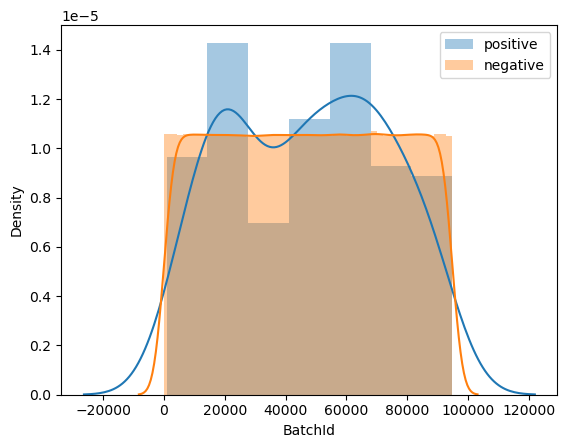

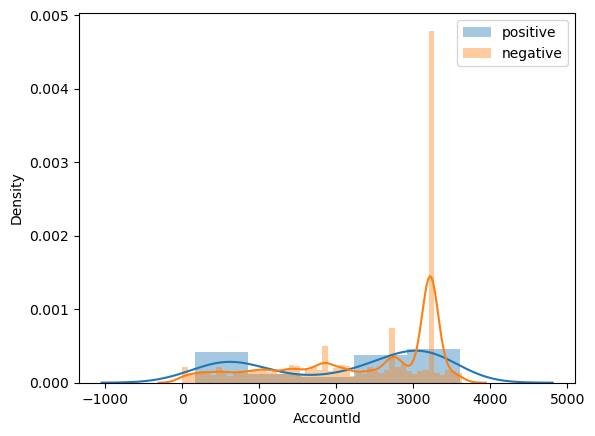

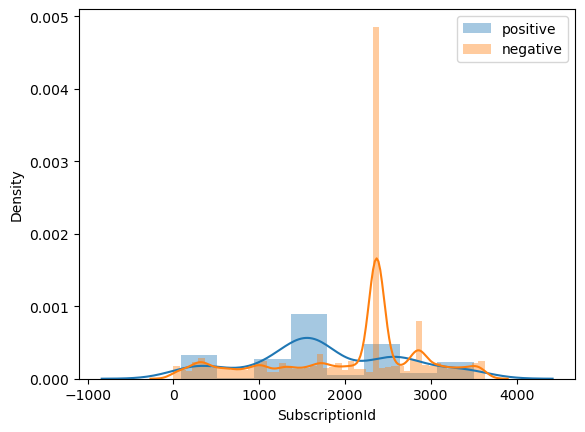

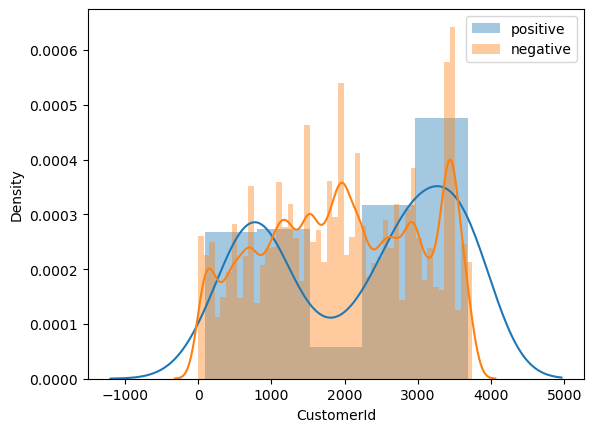

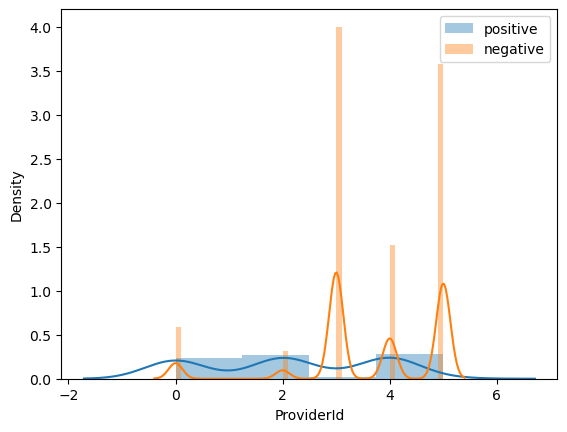

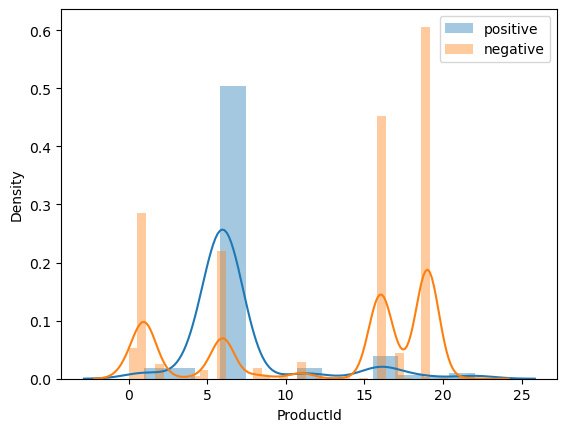

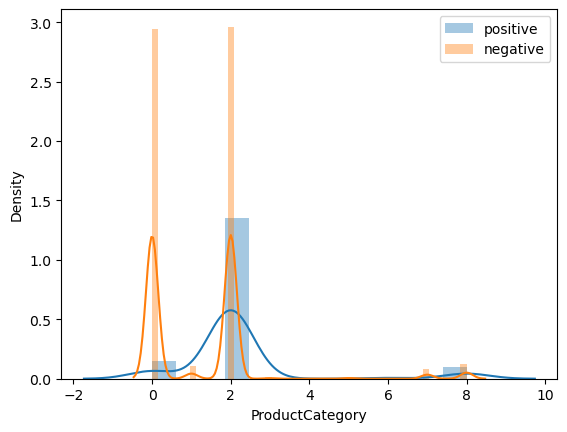

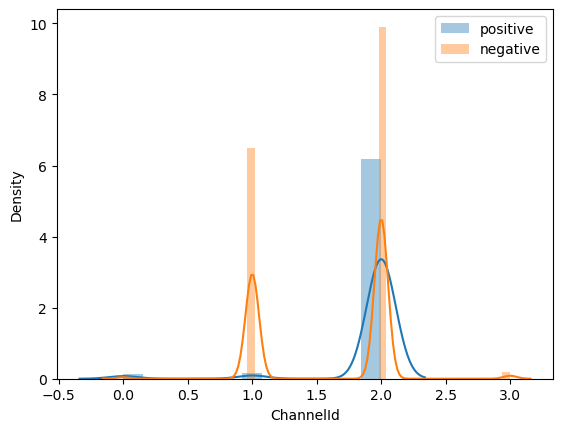

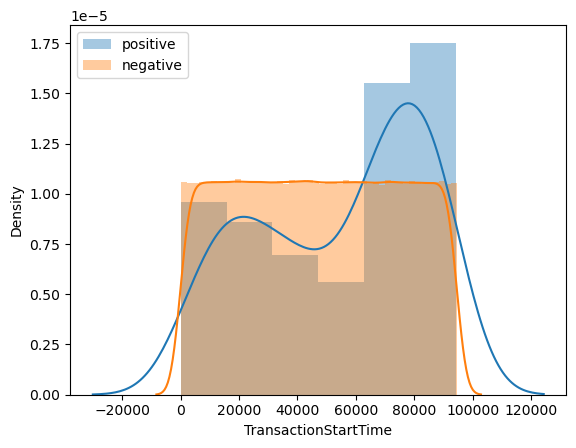

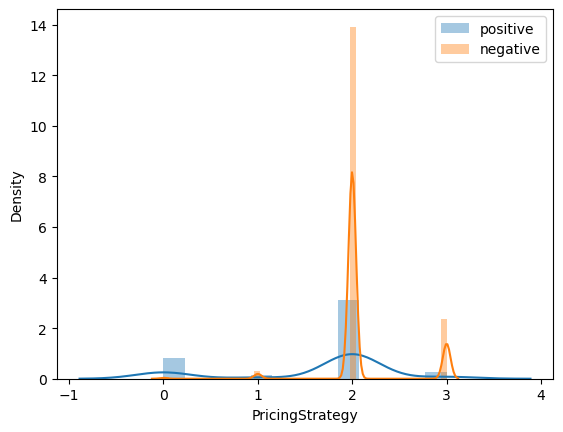

In [ ]:
import warnings
warnings.filterwarnings('ignore')

for col in df_object.columns:
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

These values are very very interesting because they give us an idea about how much a feature is important.

If we see a big difference between the negatif or positif density for a feature that means that this feature is determinant to diffenciate if a transaction is a fraud or not.

## Choice

Based on these graphics I will choose columns that have a strong difference between the positif and negative density.

In that case :
- ProviderId
- ProductId
- ProductCategory
- ChannelId
- TransactionStartTime
- PrincingStrategy

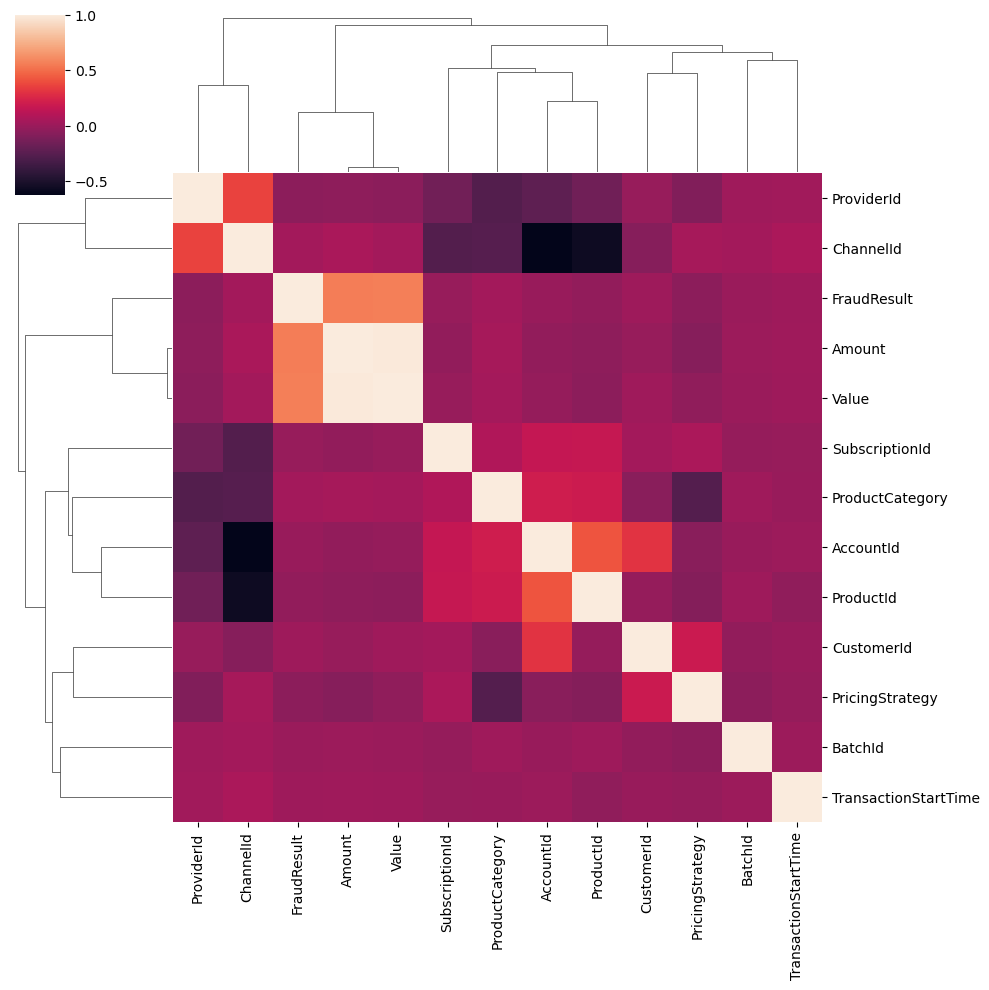

In [ ]:
sns.clustermap(df[df.columns].corr()) # .corr means that if a value is increasing, the other value is also increasing


Here we can see the correlation of the columns because it allows you to identify relationships between variables. Correlation is a statistical measure that shows how strongly two variables are related to each other.

Analyzing the correlation matrix, you can identify pairs of variables that are strongly correlated, which can help you to better understand the underlying patterns in your data

Of course Amount and Value are very correlated, the are just the opposite.

---

# 2. Creating the algorithm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import f1_score, recall_score,accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import f1_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [ ]:
train_data = pd.read_csv('training.csv')
# set the option to display all columns
pd.set_option('display.max_columns', None)

In [ ]:
train_data.drop(['CustomerId','BatchId', 'AccountId','SubscriptionId','CurrencyCode','CountryCode', 'Value','TransactionId'], axis=1, inplace=True)

y = train_data.FraudResult
X = train_data.drop(['FraudResult'], axis=1)

In [ ]:
X

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,TransactionStartTime,PricingStrategy
0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,2018-11-15T02:18:49Z,2
1,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,2018-11-15T02:19:08Z,2
2,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,2018-11-15T02:44:21Z,2
3,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,2018-11-15T03:32:55Z,2
4,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,2018-11-15T03:34:21Z,2
...,...,...,...,...,...,...,...
95657,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,2019-02-13T09:54:09Z,2
95658,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,2019-02-13T09:54:25Z,2
95659,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,2019-02-13T09:54:35Z,2
95660,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,2019-02-13T10:01:10Z,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state=0)

## Data preprocessing

### 1. Transform the categorical values with into the value after the and formatting them to get just their numeric values

In [ ]:
def id_to_int(df, features):
    for feature in features:
        df[feature] = df[feature].apply(lambda x: int(x.split('_')[1]))

id_features = ["ProviderId", "ProductId", "ChannelId"]
id_to_int(X_train, id_features)


### 2. OneHotEncode the following values ProductCategory, ProviderId, PricingStrategy, ProductId, ChannelId

We are using OneHotEncoder and not OrdinalEncoder because the columns the values are not related by an order but there are independant values

In [ ]:
features_to_encode = ['ProductCategory', "ProviderId", "PricingStrategy", "ProductId", "ChannelId"]



# Fit the encoder to the data
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(X_train[features_to_encode])

new_cols = [f'Cat_{category}' for category in encoder.categories_[0]]
new_cols += [f'Prov_{category}' for category in encoder.categories_[1]]
new_cols += [f'Price_{category}' for category in encoder.categories_[2]]
new_cols += [f'Prod_{category}' for category in encoder.categories_[3]]
new_cols += [f'Chan_{category}' for category in encoder.categories_[4]]

for df in [X_train, X_valid]:
    df_OH = encoder.transform(df[features_to_encode])
    df[new_cols] = df_OH


### 3. Feature engineering on the TransactionStartTime into Weekday, Hour and Month

In [ ]:
def transform_data(df):
    # Convert TransactionStartTime to datetime format
    df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
    
    # Split the TransactionStartTime column into a weekday column
    df['Weekday'] = df['TransactionStartTime'].dt.dayofweek + 1

    # Extract the hour from the TransactionStartTime column
    df['Hour'] = df['TransactionStartTime'].dt.hour

        # Extract the hour from the TransactionStartTime column
    df['Month'] = df['TransactionStartTime'].dt.month

    # Drop the original TransactionStartTime column
    df.drop(['TransactionStartTime'], axis=1, inplace=True)

    return df

X_train = transform_data(X_train)
X_valid = transform_data(X_valid)

X_train.drop((features_to_encode), axis=1, inplace=True)
X_valid.drop((features_to_encode), axis=1, inplace=True)


### 4. Balancing the dataset

We are using the SMOTE function which is a popular data augmentation technique used in machine learning to address class imbalance problems

SMOTE works by creating synthetic examples of the minority class by interpolating between pairs of instances in the minority class

In [ ]:
def resample_data(X, y):
    sm = SMOTE(random_state=27)
    X_resampled, y_resampled = sm.fit_resample(X, y)
    return X_resampled, y_resampled

X_train, y_train = resample_data(X_train, y_train)
X_valid, y_valid = resample_data(X_valid, y_valid)

In [ ]:
X_train

,Amount,Cat_airtime,Cat_data_bundles,Cat_financial_services,Cat_movies,Cat_other,Cat_ticket,Cat_transport,Cat_tv,Cat_utility_bill,Prov_1,Prov_2,Prov_3,Prov_4,Prov_5,Prov_6,Price_0,Price_1,Price_2,Price_4,Prod_1,Prod_2,Prod_3,Prod_4,Prod_5,Prod_6,Prod_7,Prod_8,Prod_9,Prod_10,Prod_11,Prod_12,Prod_13,Prod_14,Prod_15,Prod_16,Prod_19,Prod_20,Prod_21,Prod_22,Prod_23,Prod_24,Prod_27,Chan_1,Chan_2,Chan_3,Chan_5,Weekday,Hour,Month
0,-50.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0,7,16,1
1,1000.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,3,18,2
2,15000.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,3,4,12
3,-1000.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0,6,15,1
4,-50.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0,3,19,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152737,100000.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,4,13,1
152738,500000.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,1,20,1
152739,500000.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.886513,0.000000,0.113487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,1,14,12
152740,896796.739605,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160163,0.0,0.0,0.0,0.0,0.0,0.839837,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.160163,0.0,0.839837,0.0,6,10,10


In [ ]:
X_valid

,Amount,Cat_airtime,Cat_data_bundles,Cat_financial_services,Cat_movies,Cat_other,Cat_ticket,Cat_transport,Cat_tv,Cat_utility_bill,Prov_1,Prov_2,Prov_3,Prov_4,Prov_5,Prov_6,Price_0,Price_1,Price_2,Price_4,Prod_1,Prod_2,Prod_3,Prod_4,Prod_5,Prod_6,Prod_7,Prod_8,Prod_9,Prod_10,Prod_11,Prod_12,Prod_13,Prod_14,Prod_15,Prod_16,Prod_19,Prod_20,Prod_21,Prod_22,Prod_23,Prod_24,Prod_27,Chan_1,Chan_2,Chan_3,Chan_5,Weekday,Hour,Month
0,2.000000e+03,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,1
1,1.110000e+03,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,1.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,17,1
2,2.000000e+03,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,1.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,6,11
3,-1.000000e+03,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,1.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,17,2
4,1.000000e+03,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,1.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38191,5.000000e+05,0.636924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363076,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.363076,0.00000,0.636924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,12,4
38192,2.202671e+06,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.54962,0.000000,0.45038,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,10,7
38193,5.400000e+05,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,1.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,14,1
38194,3.000000e+06,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,11,7


## Modelisation

Lets build some model and train them

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

RandomForest = make_pipeline(RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(AdaBoostClassifier(random_state=0))
SVM = make_pipeline(StandardScaler(),SVC(random_state=0))
KNN = make_pipeline(StandardScaler(), KNeighborsClassifier())

list_of_models = [RandomForest,AdaBoost,SVM,KNN]

X_train

,Amount,Cat_airtime,Cat_data_bundles,Cat_financial_services,Cat_movies,Cat_other,Cat_ticket,Cat_transport,Cat_tv,Cat_utility_bill,Prov_1,Prov_2,Prov_3,Prov_4,Prov_5,Prov_6,Price_0,Price_1,Price_2,Price_4,Prod_1,Prod_2,Prod_3,Prod_4,Prod_5,Prod_6,Prod_7,Prod_8,Prod_9,Prod_10,Prod_11,Prod_12,Prod_13,Prod_14,Prod_15,Prod_16,Prod_19,Prod_20,Prod_21,Prod_22,Prod_23,Prod_24,Prod_27,Chan_1,Chan_2,Chan_3,Chan_5,Weekday,Hour,Month
0,-50.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0,7,16,1
1,1000.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,3,18,2
2,15000.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,3,4,12
3,-1000.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0,6,15,1
4,-50.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0,3,19,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152737,100000.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,4,13,1
152738,500000.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,1,20,1
152739,500000.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.886513,0.000000,0.113487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,1,14,12
152740,896796.739605,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160163,0.0,0.0,0.0,0.0,0.0,0.839837,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.160163,0.0,0.839837,0.0,6,10,10


In [ ]:
from sklearn.model_selection import learning_curve

def evaluation(model):
    # Preprocessing of training data, fit model 
    model.fit(X_train, y_train)   

# Preprocessing of validation data, get predictions
    preds = model.predict(X_valid)    
    print(confusion_matrix(y_valid, preds))
    print(classification_report(y_valid, preds))


#------------------- UNCOMMENT THIS IF YOU WANT TO SEE THE LEARNING CURVE --------------------
    # N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1,1,10))
                                               
    # plt.figure(figsize=(12,8))
    # plt.plot(N, train_score.mean(axis=1), label='train score')
    # plt.plot(N, val_score.mean(axis=1), label='validation score')
    return model

In [ ]:
for model in list_of_models:
    evaluation(model)
# model = evaluation(list_of_models[0])

[[19090     8]
 [ 3276 15822]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     19098
           1       1.00      0.83      0.91     19098

    accuracy                           0.91     38196
   macro avg       0.93      0.91      0.91     38196
weighted avg       0.93      0.91      0.91     38196

[[19085    13]
 [ 2100 16998]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     19098
           1       1.00      0.89      0.94     19098

    accuracy                           0.94     38196
   macro avg       0.95      0.94      0.94     38196
weighted avg       0.95      0.94      0.94     38196

[[ 1093 18005]
 [  567 18531]]
              precision    recall  f1-score   support

           0       0.66      0.06      0.11     19098
           1       0.51      0.97      0.67     19098

    accuracy                           0.51     38196
   macro avg       0.58      0.51  

## Underfitting and stabilisation

If we plot the learning curves (I did it one time, but it's too long) we can see that the model start by underfitting and at the end of the training, it will be stabilized.

The training score and validation score will be very close.

## Optimisation

We train some model and now we have to optimize them by changing their hyperparameters.

To do that we will use RandomizedSearchCV which is a version of GridSearchCV that allows us to make everything like GridSearchCV but by randomizing the process and thus using less performance and time.

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Here I made the choice to take the RandomForest algorithm because I noticed by testing in the Zindi website that the RandomForest is one of the best algorithms, so I will keep the optimization on this algorithm

In [ ]:
RandomForest.get_params()

{'memory': None,
 'steps': [('randomforestclassifier', RandomForestClassifier(random_state=0))],
 'verbose': False,
 'randomforestclassifier': RandomForestClassifier(random_state=0),
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__n_jobs': None,
 'randomforestclassifier__oob_score': False,
 'randomforestclassifier__random_state': 0,
 'randomforestclassifier__verbose': 0,
 'randomforestclassifier

There are all the params that we can modify and test over the RandomForest, let's test some modification

In [ ]:
param_distributions = {
    "randomforestclassifier__n_estimators": [50, 100, 150],
    "randomforestclassifier__max_depth": [None, 5, 10],
    "randomforestclassifier__max_features": ["sqrt", "log2"],
    "randomforestclassifier__min_samples_split": [2, 5, 10],
    "randomforestclassifier__min_samples_leaf": [1, 2, 4],
    "randomforestclassifier__bootstrap": [True, False],
}


I will train it over 5 cross-validations and 20 iterations

In [ ]:
rf_pipeline = make_pipeline(RandomForestClassifier(random_state=0))
random_search = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    n_jobs=-1,
    random_state=0,
    scoring='f1'
)


random_search.fit(X_train, y_train)

print("Best Parameters:")
print(random_search.best_params_)
print("Best Score:")
print(random_search.best_score_)


Best Parameters:
{'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': None, 'randomforestclassifier__bootstrap': True}
Best Score:
0.9994762970732756


---

# Preprocess, predict the testset + submission

In [ ]:
test_data = pd.read_csv('test.csv')
test_data

transactionid = test_data.TransactionId
transactionid

0         TransactionId_50600
1         TransactionId_95109
2         TransactionId_47357
3         TransactionId_28185
4         TransactionId_22140
                 ...         
45014    TransactionId_116198
45015     TransactionId_24829
45016    TransactionId_102920
45017    TransactionId_128439
45018     TransactionId_45927
Name: TransactionId, Length: 45019, dtype: object

In [ ]:
test_data.drop(['CustomerId','BatchId', 'AccountId','SubscriptionId','CurrencyCode','CountryCode', 'Value','TransactionId'], axis=1, inplace=True)

def id_to_int(df, features):
    for feature in features:
        df[feature] = df[feature].apply(lambda x: int(x.split('_')[1]))

id_features = ["ProviderId", "ProductId", "ChannelId"]
id_to_int(test_data, id_features)

features_to_encode = ['ProductCategory', "ProviderId", "PricingStrategy", "ProductId", "ChannelId"]


new_cols = [f'Cat_{category}' for category in encoder.categories_[0]]
new_cols += [f'Prov_{category}' for category in encoder.categories_[1]]
new_cols += [f'Price_{category}' for category in encoder.categories_[2]]
new_cols += [f'Prod_{category}' for category in encoder.categories_[3]]
new_cols += [f'Chan_{category}' for category in encoder.categories_[4]]

df_OH = encoder.transform(test_data[features_to_encode])
test_data[new_cols] = df_OH


def transform_data(df):
    # Convert TransactionStartTime to datetime format
    df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
    
    # Split the TransactionStartTime column into a weekday column
    df['Weekday'] = df['TransactionStartTime'].dt.dayofweek + 1

    # Extract the hour from the TransactionStartTime column
    df['Hour'] = df['TransactionStartTime'].dt.hour

        # Extract the hour from the TransactionStartTime column
    df['Month'] = df['TransactionStartTime'].dt.month

    # Drop the original TransactionStartTime column
    df.drop(['TransactionStartTime'], axis=1, inplace=True)

    return df

test_data = transform_data(test_data)
# X_valid = transform_data(X_valid)

test_data.drop((features_to_encode), axis=1, inplace=True)
# X_valid.drop((features_to_encode), axis=1, inplace=True)

test_data

,Amount,Cat_airtime,Cat_data_bundles,Cat_financial_services,Cat_movies,Cat_other,Cat_ticket,Cat_transport,Cat_tv,Cat_utility_bill,Prov_1,Prov_2,Prov_3,Prov_4,Prov_5,Prov_6,Price_0,Price_1,Price_2,Price_4,Prod_1,Prod_2,Prod_3,Prod_4,Prod_5,Prod_6,Prod_7,Prod_8,Prod_9,Prod_10,Prod_11,Prod_12,Prod_13,Prod_14,Prod_15,Prod_16,Prod_19,Prod_20,Prod_21,Prod_22,Prod_23,Prod_24,Prod_27,Chan_1,Chan_2,Chan_3,Chan_5,Weekday,Hour,Month
0,1000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,10,2
1,2000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,10,2
2,-50.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,10,2
3,3000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,10,2
4,-60.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45014,-5000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,23,3
45015,10000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,23,3
45016,10000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,23,3
45017,-5000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,23,3


In [ ]:
# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[
    # ('preprocessor', preprocessor),
                      ('model', random_search)
                     ])

real_preds = clf.predict(test_data)

real_preds = pd.Series(real_preds, name='FraudResult')

result = pd.concat([transactionid, real_preds], axis=1)

my_submission = result.to_csv("my_submission.csv",index=False)

# Conclusion

I have 0.68 % of private score on Zindi with this algorithm.

I had 0.71 % in a previous submission but in this one, I did'nt use OneHotEncoder on my 5 categorical values but I used OrdinalEncoder which is not coherent with what I explained previously about why I used OneHotEncoder.

I prefered to be more logical on the machine learning approach



It could be possible to upgrade the model : 
- Using more feature engineering by modeling some cluster with for exmeple BatchId.
- Looking for other types of algorithms like MLP which are very powerfull with these kind of big dataset
- Using PCA for reduction of dimensionality
- More fine-tuning with RandomizedSearchCV to tune the hyperparameter